### Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan:
#### 1. Imputasi missing value dengan mean, median, dan modus


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('C:/Users/azkaw/OneDrive/Documents/College/code/Infrastruktur dan Platform untuk Sains Data/Modul 3/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [4]:
missing_values = df.isnull().sum()

df_mean_imputed = df.fillna(df.mean())
df_median_imputed = df.fillna(df.median())
df_mode_imputed = df.fillna(df.mode().iloc[0])  

df_mean_imputed.head(), df_median_imputed.head(), df_mode_imputed.head()

originalFeatures = df.columns
print('Shape:', df.shape)
print('\nHave', len(originalFeatures), 'features')
print(f'\n{originalFeatures}')
print(f'\n  Original Diabetes Dataset:\n{df.head()}')
print(f'\n  Missing values:\n{missing_values}')
print(f'\n  Missing values percentage:\n{(missing_values / len(df)) * 100}')

print(f'\n  Mean Imputed Dataset:\n{df_mean_imputed.head()}')
print(f'\n  Median Imputed Dataset:\n{df_median_imputed.head()}')
print(f'\n  Mode Imputed Dataset:\n{df_mode_imputed.head()}')

Shape: (768, 9)

Have 9 features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

  Original Diabetes Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   NaN        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                       NaN  33.0        1  

  Missing values:
Pregnancies                  77
Glucose              

Kode di atas bertujuan untuk menangani masalah nilai yang hilang dalam dataset diabetes dengan tiga metode imputasi yang berbeda, yaitu mean, median, dan modus. Informasi yang ditampilkan memberikan gambaran yang jelas tentang struktur dataset, nilai yang hilang, dan bagaimana data telah dimodifikasi melalui proses imputasi.

#### 2. Cek korelasi antar variabel dengan heatmap

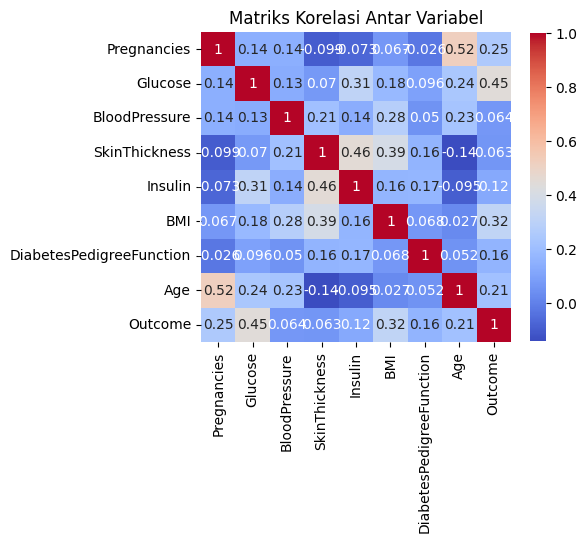

In [46]:
plt.figure(figsize=(5, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

Kode di atas menghasilkan visualisasi yang membantu dalam memahami hubungan antara berbagai variabel pada dataset diabetes. Dengan melihat heatmap, bisa dengan cepat mengetahui variabel mana yang memiliki hubungan kuat, baik positif maupun negatif.

#### 3. Lakukan imbalance handling dengan undersampling

In [44]:
from sklearn.utils import resample

majority_class = df[df['Outcome'] == 0]
minority_class = df[df['Outcome'] == 1]

majority_class_undersampled = resample(majority_class, 
                                       replace=False,    
                                       n_samples=len(minority_class),  
                                       random_state=42)  

df_balanced = pd.concat([majority_class_undersampled, minority_class])

df_balanced['Outcome'].value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

Kode di atas berfungsi untuk menangani masalah ketidakseimbangan kelas dalam dataset diabetes, yang dapat mempengaruhi performa model pembelajaran mesin. Dengan melakukan undersampling pada kelas mayoritas, dapat menciptakan dataset yang lebih seimbang, yang membantu model untuk belajar dengan lebih baik dari kedua kelas. Menampilkan jumlah setiap kelas setelah penggabungan memastikan bahwa langkah ini berhasil dan data sekarang seimbang.

#### 4. Lakukan scaling dengan robust scaler dan minmax

In [19]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

X = df_balanced.drop('Outcome', axis=1)  
y = df_balanced['Outcome']                 

robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)

minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

df_robust_scaled = pd.DataFrame(X_robust_scaled, columns=X.columns)
df_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)

df_robust_scaled['Outcome'] = y.values
df_minmax_scaled['Outcome'] = y.values

df_robust_scaled.head(), df_minmax_scaled.head()

(   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0         -0.4 -0.545455         -0.125        0.50000       NaN       NaN   
 1          0.4       NaN         -1.500       -0.75000 -0.130769  0.121212   
 2          0.0 -0.227273         -0.875        0.21875  0.207692 -0.387879   
 3         -0.2  0.181818          0.750       -0.75000 -0.130769 -0.569697   
 4          0.8 -0.431818          0.125        0.50000       NaN  0.545455   
 
    DiabetesPedigreeFunction     Age  Outcome  
 0                 -0.391252 -0.0625        0  
 1                  0.668287 -0.3750        0  
 2                  0.123937 -0.5625        0  
 3                 -0.230863 -0.2500        0  
 4                 -0.425273     NaN        0  ,
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0     0.058824  0.487437       0.614035       0.404040       NaN       NaN   
 1     0.294118       NaN       0.421053       0.000000  0.000000  0.502235  